In [1]:
#import required libraries
import pandas as pd
import numpy as np

# Data cleaning

In [2]:
#read data available from companies
companies = pd.read_csv("companies.csv", encoding='ISO-8859-1')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
# Information about features of the dataset available
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [4]:
# reading data from second file; creation of dataframe
rounds2 = pd.read_csv("rounds2.csv", encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
# Converting the Permalink to lowercase in both dataframes in order to check the unique count of companies -> strip the spaces

rounds2['key'] = rounds2.company_permalink.str.strip()
rounds2['key'] = rounds2.key.str.lower()
companies['key'] = companies.permalink.str.strip()
companies['key'] = companies.key.str.lower()

In [7]:
#counting the number of unique company names in round2 dataset

rounds2.key.nunique()

66370

In [8]:
#counting the number of unique company names in companies dataset

companies.key.nunique()

66368

In [9]:
# data present in round2, not in companies
round2_not_in_companies = rounds2[~(rounds2['key'].isin(companies['key']))]

#details of them
round2_not_in_companies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 29597 to 113839
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        7 non-null      object 
 1   funding_round_permalink  7 non-null      object 
 2   funding_round_type       7 non-null      object 
 3   funding_round_code       1 non-null      object 
 4   funded_at                7 non-null      object 
 5   raised_amount_usd        1 non-null      float64
 6   key                      7 non-null      object 
dtypes: float64(1), object(6)
memory usage: 448.0+ bytes


In [10]:
round2_not_in_companies.key.nunique()

7

### Merging the 2 datasets

In [11]:
# merging both dataframes into one master dataframe
master_frame = pd.merge(rounds2, companies, on = "key",how = "outer")

In [12]:
#checking the details
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114954 entries, 0 to 114953
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   key                      114954 non-null  object 
 7   permalink                114947 non-null  object 
 8   name                     114946 non-null  object 
 9   homepage_url             108813 non-null  object 
 10  category_list            111538 non-null  object 
 11  status                   114947 non-null  object 
 12  country_code             106271 non-null  object 
 13  state_code               104003 non-null  object 
 14  regi

In [13]:
master_frame.key.nunique()

66375

# Analysing Funding types

In [14]:
# getting all unique funding types
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance', nan], dtype=object)

In [15]:
# calculating most representative value of the investment amount using "Mediam"
master_frame.loc[master_frame['funding_round_type']=='seed']['raised_amount_usd'].median()

275000.0

In [16]:
master_frame.loc[master_frame['funding_round_type']=='angel']['raised_amount_usd'].median()

400000.0

In [17]:
master_frame.loc[master_frame['funding_round_type'] == 'venture']['raised_amount_usd'].median()

5000000.0

In [18]:
master_frame.loc[master_frame['funding_round_type']=='private_equity']['raised_amount_usd'].median()

20000000.0

In [19]:
master_frame.dtypes

company_permalink           object
funding_round_permalink     object
funding_round_type          object
funding_round_code          object
funded_at                   object
raised_amount_usd          float64
key                         object
permalink                   object
name                        object
homepage_url                object
category_list               object
status                      object
country_code                object
state_code                  object
region                      object
city                        object
founded_at                  object
dtype: object

In [20]:
master_frame[["funding_round_type", "raised_amount_usd"]].groupby('funding_round_type').agg(['median']).loc[['venture','angel','seed','private_equity']]

,raised_amount_usd
,median
funding_round_type,
venture,5000000.0
angel,400000.0
seed,275000.0
private_equity,20000000.0


In [21]:
# dataframe for venture type investment
venture_frame = master_frame.loc[master_frame['funding_round_type'] == 'venture']

In [22]:
print(venture_frame.info())
venture_frame.key.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 114946
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        55494 non-null  object 
 1   funding_round_permalink  55494 non-null  object 
 2   funding_round_type       55494 non-null  object 
 3   funding_round_code       30985 non-null  object 
 4   funded_at                55494 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   key                      55494 non-null  object 
 7   permalink                55493 non-null  object 
 8   name                     55493 non-null  object 
 9   homepage_url             52548 non-null  object 
 10  category_list            54362 non-null  object 
 11  status                   55493 non-null  object 
 12  country_code             52619 non-null  object 
 13  state_code               51698 non-null  object 
 14  region               

32468

In [23]:
venture_frame.country_code.nunique()

103

In [24]:
# sorting values as per the amount raised

venture_frame.sort_values(['raised_amount_usd'], ascending= False, inplace=True)

/var/folders/d8/l3kyljpj40nd8c0s4fgqr8pc0000gn/T/ipykernel_47805/2893863394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venture_frame.sort_values(['raised_amount_usd'], ascending= False, inplace=True)


In [25]:
venture_frame['primary_sector']=venture_frame['category_list'].apply(lambda x:np.nan if x is np.nan else x.split('|')[0])

/var/folders/d8/l3kyljpj40nd8c0s4fgqr8pc0000gn/T/ipykernel_47805/667716757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  venture_frame['primary_sector']=venture_frame['category_list'].apply(lambda x:np.nan if x is np.nan else x.split('|')[0])


# Country analysis


In [26]:
#data frame with the top nine countries (based on the total investment amount each country has received)
top9= pd.DataFrame(venture_frame.groupby(venture_frame['country_code']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False).nlargest(9,'Raised_amount'))

In [27]:
top9

,Raised_amount,Raised_count
country_code,,
USA,4.225108e+11,36139
CHN,3.983542e+10,1564
GBR,2.024563e+10,2055
IND,1.439186e+10,824
CAN,9.583332e+09,1256
FRA,7.259537e+09,917
ISR,6.907515e+09,796
DEU,6.346960e+09,558
JPN,3.363677e+09,274


In [28]:
rows = ['USA', 'GBR', 'IND']
cols = ['Raised_amount','Raised_count']
top9.loc[rows, cols]

,Raised_amount,Raised_count
country_code,,
USA,4.225108e+11,36139
GBR,2.024563e+10,2055
IND,1.439186e+10,824


### Sector analysis 1

In [29]:
mapping = pd.read_csv("mapping.csv", encoding='ISO-8859-1')

In [30]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [31]:
#Using the mapping file 'mapping.csv', we map each primary sector to one of the eight main sectors 
# Find all the main-sectors in a list
mapping_column_list = list(mapping.columns.values)
mapping_column_list = mapping_column_list[1:]

In [32]:
mapping_column_list

['Automotive & Sports',
 'Blanks',
 'Cleantech / Semiconductors',
 'Entertainment',
 'Health',
 'Manufacturing',
 'News, Search and Messaging',
 'Others',
 'Social, Finance, Analytics, Advertising']

In [33]:
# removing null values
mapping['main_sector'] = np.nan

In [34]:
for col in mapping_column_list:
    mapping.loc[mapping[col] == 1,'main_sector']=col

In [35]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [36]:
# Renaming the Category-List to Primary Sector; 
#It will be needed to merge the Primary Sector and its associated main sector in the master frame;
mapping.rename(columns={"category_list": "primary_sector"},inplace=True)
mapping.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [37]:
#mapping main sector in venture dataframe 
venture_frame_main_sector = pd.merge(venture_frame, mapping[['primary_sector', 'main_sector']], on='primary_sector', how='left')

In [38]:
# checking the records of the venture_frame_main_secto
venture_frame_main_sector.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55494 entries, 0 to 55493
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        55494 non-null  object 
 1   funding_round_permalink  55494 non-null  object 
 2   funding_round_type       55494 non-null  object 
 3   funding_round_code       30985 non-null  object 
 4   funded_at                55494 non-null  object 
 5   raised_amount_usd        50228 non-null  float64
 6   key                      55494 non-null  object 
 7   permalink                55493 non-null  object 
 8   name                     55493 non-null  object 
 9   homepage_url             52548 non-null  object 
 10  category_list            54362 non-null  object 
 11  status                   55493 non-null  object 
 12  country_code             52619 non-null  object 
 13  state_code               51698 non-null  object 
 14  region                

### Merged data frame with each primary sector mapped to its main sector 

In [39]:
master_frame['primary_sector']=master_frame['category_list'].apply(lambda x:np.nan if x is np.nan else x.split('|')[0])

In [40]:
master_sector_frame = pd.merge(master_frame, mapping[['primary_sector', 'main_sector']], on='primary_sector', how='left')

In [41]:
master_sector_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114954 entries, 0 to 114953
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   key                      114954 non-null  object 
 7   permalink                114947 non-null  object 
 8   name                     114946 non-null  object 
 9   homepage_url             108813 non-null  object 
 10  category_list            111538 non-null  object 
 11  status                   114947 non-null  object 
 12  country_code             106271 non-null  object 
 13  state_code               104003 non-null  object 
 14  regi

### Sector analysis 2
#### Creating three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type "FT=venture" falling within the 5-15 million USD range

In [42]:
df_USA=master_sector_frame.loc[(master_sector_frame['country_code']=='USA') & (master_sector_frame['funding_round_type']=='venture') & (master_sector_frame['raised_amount_usd'].between(5000000,200000000))]
df_GBR=master_sector_frame.loc[(master_sector_frame['country_code']=='GBR') & (master_sector_frame['funding_round_type']=='venture') & (master_sector_frame['raised_amount_usd'].between(5000000,200000000))]
df_IND=master_sector_frame.loc[(master_sector_frame['country_code']=='IND') & (master_sector_frame['funding_round_type']=='venture') & (master_sector_frame['raised_amount_usd'].between(5000000,200000000))]

In [43]:
df_USA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18884 entries, 10 to 114936
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        18884 non-null  object 
 1   funding_round_permalink  18884 non-null  object 
 2   funding_round_type       18884 non-null  object 
 3   funding_round_code       13704 non-null  object 
 4   funded_at                18884 non-null  object 
 5   raised_amount_usd        18884 non-null  float64
 6   key                      18884 non-null  object 
 7   permalink                18884 non-null  object 
 8   name                     18884 non-null  object 
 9   homepage_url             17997 non-null  object 
 10  category_list            18753 non-null  object 
 11  status                   18884 non-null  object 
 12  country_code             18884 non-null  object 
 13  state_code               18878 non-null  object 
 14  region              

In [44]:
df_GBR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 965 entries, 401 to 114916
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        965 non-null    object 
 1   funding_round_permalink  965 non-null    object 
 2   funding_round_type       965 non-null    object 
 3   funding_round_code       625 non-null    object 
 4   funded_at                965 non-null    object 
 5   raised_amount_usd        965 non-null    float64
 6   key                      965 non-null    object 
 7   permalink                965 non-null    object 
 8   name                     965 non-null    object 
 9   homepage_url             919 non-null    object 
 10  category_list            954 non-null    object 
 11  status                   965 non-null    object 
 12  country_code             965 non-null    object 
 13  state_code               946 non-null    object 
 14  region               

In [45]:
df_IND.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 114672
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        526 non-null    object 
 1   funding_round_permalink  526 non-null    object 
 2   funding_round_type       526 non-null    object 
 3   funding_round_code       344 non-null    object 
 4   funded_at                526 non-null    object 
 5   raised_amount_usd        526 non-null    float64
 6   key                      526 non-null    object 
 7   permalink                526 non-null    object 
 8   name                     526 non-null    object 
 9   homepage_url             519 non-null    object 
 10  category_list            523 non-null    object 
 11  status                   526 non-null    object 
 12  country_code             526 non-null    object 
 13  state_code               523 non-null    object 
 14  region                 

In [46]:
# printing sum, count of amount raise for each of the three countries
print(df_USA.raised_amount_usd.agg(['sum', 'count']))

sum      3.370035e+11
count    1.888400e+04
Name: raised_amount_usd, dtype: float64


In [47]:
print(df_GBR.raised_amount_usd.agg(['sum', 'count']))

sum      1.639244e+10
count    9.650000e+02
Name: raised_amount_usd, dtype: float64


In [48]:
print(df_IND.raised_amount_usd.agg(['sum', 'count']))

sum      1.052409e+10
count    5.260000e+02
Name: raised_amount_usd, dtype: float64


## The total number of investments and the total amount of investments in each main sector

In [49]:
df_USA_sector_group = pd.DataFrame(df_USA.groupby(df_USA['main_sector']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_count', ascending=False))
df_USA_sector_group.head(10)

,Raised_amount,Raised_count
main_sector,,
Cleantech / Semiconductors,8.920167e+10,4293
Others,6.911088e+10,4182
"Social, Finance, Analytics, Advertising",4.667678e+10,2771
"News, Search and Messaging",3.726473e+10,2221
Health,2.830955e+10,1547
Manufacturing,2.205194e+10,1265
Entertainment,1.383724e+10,849
Automotive & Sports,4.986810e+09,263
Blanks,2.302273e+09,131


In [50]:
df_GBR_sector_group = pd.DataFrame(df_GBR.groupby(df_GBR['main_sector']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_count', ascending=False))
df_GBR_sector_group.head(10)

,Raised_amount,Raised_count
main_sector,,
Cleantech / Semiconductors,4.283907e+09,224
Others,3.349222e+09,209
"Social, Finance, Analytics, Advertising",2.501493e+09,144
"News, Search and Messaging",1.798957e+09,112
Entertainment,1.006834e+09,71
Manufacturing,8.923881e+08,59
Health,9.256560e+08,47
Automotive & Sports,4.442824e+08,25
Blanks,1.685320e+08,11


In [51]:
df_IND_sector_group = pd.DataFrame(df_IND.groupby(df_IND['main_sector']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_count', ascending=False))
df_IND_sector_group.head(10)

,Raised_amount,Raised_count
main_sector,,
Others,4.001650e+09,180
"News, Search and Messaging",1.628035e+09,83
Entertainment,9.154300e+08,51
"Social, Finance, Analytics, Advertising",7.993587e+08,44
Manufacturing,6.940000e+08,38
Cleantech / Semiconductors,7.427700e+08,34
Health,5.257400e+08,28
Automotive & Sports,4.386000e+08,23
Blanks,1.270000e+08,3


#### Company in USA that  received the highest investment for top Sector and second-best Sector

In [52]:
target_sector=df_USA_sector_group.index[0]
print(target_sector)
df_top_sector_USA=df_USA[df_USA['main_sector']==target_sector]

target_sector=df_USA_sector_group.index[1]
print(target_sector)
df_second_best_sector_USA=df_USA[df_USA['main_sector']==target_sector]

Cleantech / Semiconductors
Others


In [53]:
df_USA_top_sector = pd.DataFrame(df_top_sector_USA.groupby(df_top_sector_USA['key']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False))
df_USA_second_best_sector = pd.DataFrame(df_second_best_sector_USA.groupby(df_second_best_sector_USA['key']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False))

In [54]:
df_USA_top_sector.head()

,Raised_amount,Raised_count
key,,
/organization/better-place,425000000.0,3
/organization/adaptive-biotechnologies,398999480.0,4
/organization/brightsource-energy,381000000.0,4
/organization/ngm-biopharmaceuticals,333988996.0,7
/organization/intarcia-therapeutics,331514583.0,7


In [55]:
df_USA_second_best_sector.head()

,Raised_amount,Raised_count
key,,
/organization/livingsocial,418225039.0,7
/organization/social-finance-inc,398000000.0,4
/organization/facebook,375200000.0,6
/organization/wayfair,358000000.0,3
/organization/social-finance,357199900.0,3


#### Company in GBR that received the highest investment for top Sector and second-best Sector

In [56]:
target_sector=df_GBR_sector_group.index[0]
print(target_sector)
df_top_sector_GBR=df_GBR[df_GBR['main_sector']==target_sector]

target_sector=df_GBR_sector_group.index[1]
print(target_sector)
df_second_best_sector_GBR=df_GBR[df_GBR['main_sector']==target_sector]

Cleantech / Semiconductors
Others


In [57]:
df_GBR_top_sector = pd.DataFrame(df_top_sector_GBR.groupby(df_top_sector_GBR['key']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False))
df_GBR_second_best_sector = pd.DataFrame(df_second_best_sector_GBR.groupby(df_second_best_sector_GBR['key']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False))

In [58]:
df_GBR_top_sector.head()

,Raised_amount,Raised_count
key,,
/organization/reneuron-group,150859892.0,3
/organization/circassia,144630999.0,3
/organization/biovex,133314585.0,4
/organization/kymab,120400000.0,3
/organization/oxford-immunotec,106550010.0,4


In [59]:
df_GBR_second_best_sector.head()

,Raised_amount,Raised_count
key,,
/organization/farfetch,190000000.0,4
/organization/liquid-telecom,150000000.0,1
/organization/picochip,111500000.0,6
/organization/newvoicemedia,111300000.0,4
/organization/six-degrees-group,106392886.0,2


#### Company in IND that received the highest investment for top Sector and second-best Sector

In [60]:
target_sector=df_IND_sector_group.index[0]
print(target_sector)
df_top_sector_IND=df_IND[df_IND['main_sector']==target_sector]

target_sector=df_IND_sector_group.index[1]
print(target_sector)
df_second_best_sector_IND=df_IND[df_IND['main_sector']==target_sector]

Others
News, Search and Messaging


In [61]:
df_IND_top_sector = pd.DataFrame(df_top_sector_IND.groupby(df_top_sector_IND['key']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False))
df_IND_second_best_sector = pd.DataFrame(df_second_best_sector_IND.groupby(df_second_best_sector_IND['key']).raised_amount_usd.agg(['sum', 'count']).rename(columns={'sum': 'Raised_amount', 'count':'Raised_count'}).sort_values(by='Raised_amount', ascending=False))

In [62]:
df_IND_top_sector.head()

,Raised_amount,Raised_count
key,,
/organization/flipkart,540000000.0,5
/organization/snapdeal,310699998.0,5
/organization/myntra,158750000.0,8
/organization/pepperfry-com,128000000.0,4
/organization/delhivery,126000000.0,3


In [63]:
df_IND_second_best_sector.head()

,Raised_amount,Raised_count
key,,
/organization/quikr-india,346000000.0,6
/organization/freecharge,113000000.0,2
/organization/micromax-informatics,88000000.0,2
/organization/hike,86000000.0,3
/organization/indiahomes,74800000.0,2


# Plots

In [64]:
import matplotlib.pyplot as plt

<Axes: xlabel='funding_round_type'>

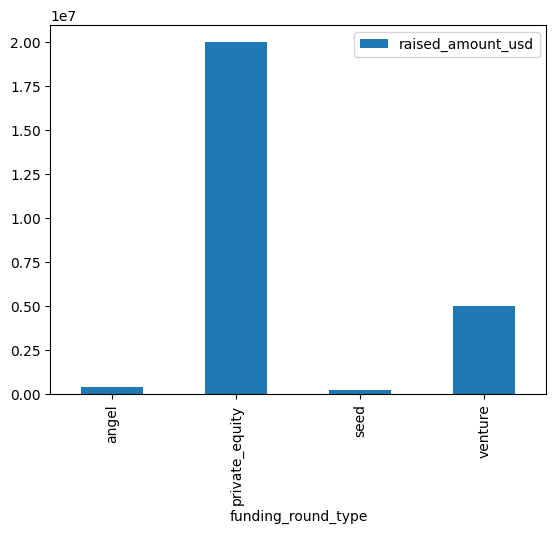

In [65]:
#Barplot to demonstrate the total investments again each funding_type
dfx = pd.DataFrame(master_frame.groupby(['funding_round_type'])['raised_amount_usd'].median())
dfx.loc[dfx.index.isin(['angel','private_equity', 'venture', 'seed'])].plot.bar()

<Axes: xlabel='country_code'>

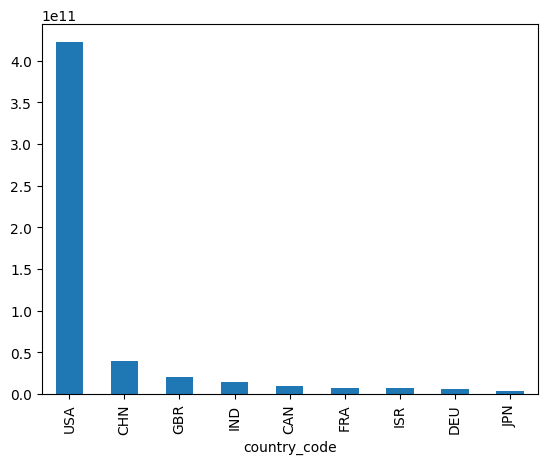

In [66]:
# Bar plot for the top 9 countries
venture_frame.groupby(['country_code'])['raised_amount_usd'].sum().nlargest(9).plot.bar()

In [68]:
df_new = venture_frame_main_sector[venture_frame_main_sector['country_code'].isin(['USA','GBR','IND'])]
df_new = df_new[df_new['raised_amount_usd'].between(5000000,200000000)]                                                     

In [69]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20375 entries, 140 to 25941
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        20375 non-null  object 
 1   funding_round_permalink  20375 non-null  object 
 2   funding_round_type       20375 non-null  object 
 3   funding_round_code       14673 non-null  object 
 4   funded_at                20375 non-null  object 
 5   raised_amount_usd        20375 non-null  float64
 6   key                      20375 non-null  object 
 7   permalink                20375 non-null  object 
 8   name                     20375 non-null  object 
 9   homepage_url             19435 non-null  object 
 10  category_list            20230 non-null  object 
 11  status                   20375 non-null  object 
 12  country_code             20375 non-null  object 
 13  state_code               20347 non-null  object 
 14  region              

In [70]:
#Pivot table creation for top3 contries vs Main Sectors
sector_for_top3_countries= pd.pivot_table(data=df_new, values="raised_amount_usd", index="country_code", columns="main_sector", aggfunc=len)

In [71]:
#Check the count of investments done against each sector in Pivot table
sector_for_top3_countries

main_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
country_code,,,,,,,,,
GBR,25,11,224,71,47,59,112,209,144
IND,23,3,34,51,28,38,83,180,44
USA,263,131,4293,849,1547,1265,2221,4182,2771


<Axes: xlabel='country_code'>

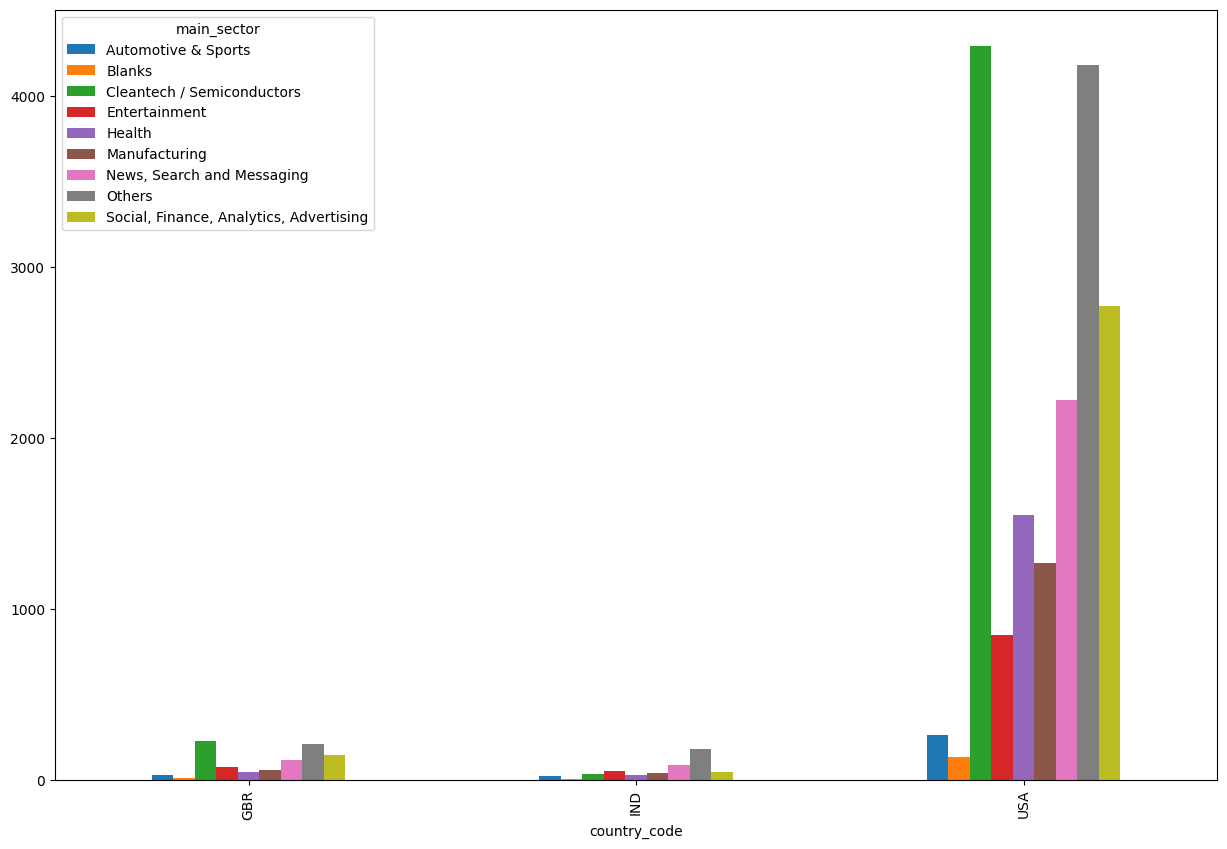

In [72]:
#Plot a bar graph and observe the highest bars
sector_for_top3_countries.plot(kind="bar", figsize=(15,10), stacked = False)